In [1]:
import os

from GraphRicciCurvature.OllivierRicci import OllivierRicci
import networkx as nx
import matplotlib.pyplot as plt

from linear_geodesic_optimization.data import input_network
from linear_geodesic_optimization.plot import get_network_plot

In [2]:
probes_file_path = os.path.join('..', 'data', 'toy', 'animation', 'probes.csv')
latencies_file_path = os.path.join('..', 'data', 'toy', 'animation', 'latencies', '0.csv')
# probes_file_path = os.path.join('..', 'data', 'test_US', 'probes.csv')
# latencies_file_path = os.path.join('..', 'data', 'test_US', 'latencies', '20240501000000.csv')

graph = input_network.get_graph_from_paths(probes_file_path, latencies_file_path, epsilon=10., clustering_distance=500000.)

In [3]:
def compute_curvatures(graph, alpha):
    orc = OllivierRicci(graph, weight='weight', alpha=alpha, proc=1)
    graph = orc.compute_ricci_curvature()

    for _, _, d in graph.edges(data=True):
        d['ricciCurvature'] /= (1. - alpha)

    return graph, {
        (min(u, v), max(u, v)): d['ricciCurvature']
        for u, v, d in graph.edges(data=True)
    }

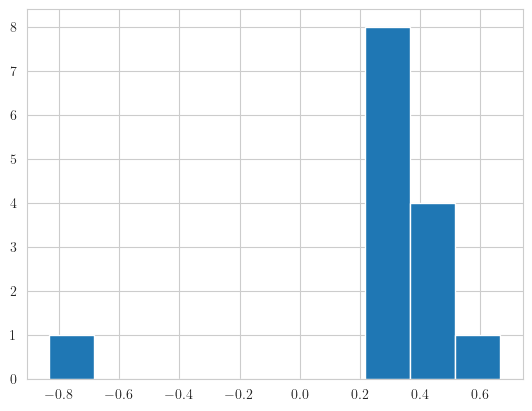

In [4]:
graph, profile_0 = compute_curvatures(graph, 0.)
plt.hist(profile_0.values())
plt.show()

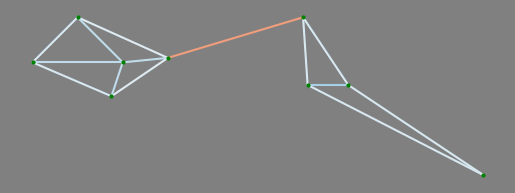

In [5]:
get_network_plot(graph)
plt.show()

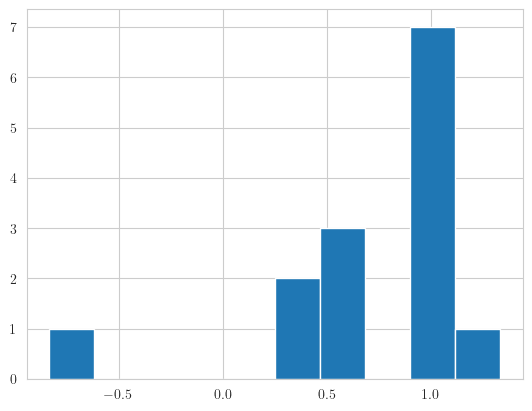

In [6]:
graph, profile_0_99999 = compute_curvatures(graph, 0.99999)
plt.hist(profile_0_99999.values())
plt.show()

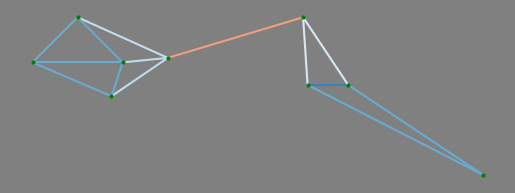

In [7]:
get_network_plot(graph)
plt.show()

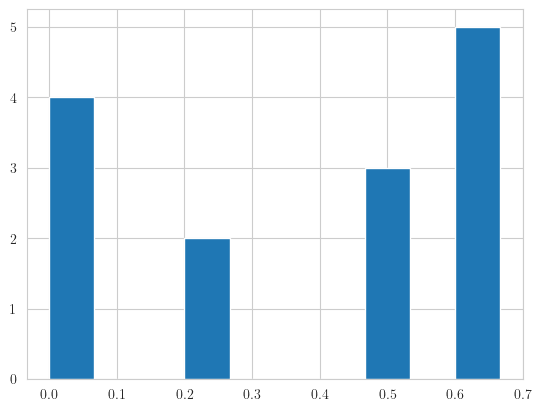

In [8]:
differences = {
    edge: profile_0_99999[edge] - profile_0[edge]
    for edge in profile_0
}
plt.hist(differences.values())
plt.show()

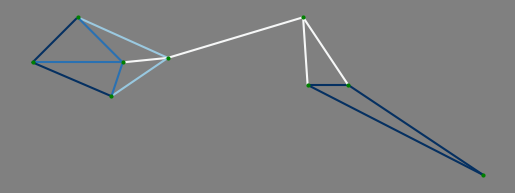

In [9]:
for u, v, d in graph.edges(data=True):
    d['difference'] = differences[(min(u, v), max(u, v))]
get_network_plot(graph, 'difference', -max(differences.values()), max(differences.values()))
plt.show()